<a href="https://colab.research.google.com/github/HoagMinhTuan/PROJECT-AI-FINAL/blob/main/Defect_Mango_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
X_DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/PROJECT AI FINAL/data.pickle'
Y_DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/PROJECT AI FINAL/train.csv'
import pandas as pd
y_data = pd.read_csv(Y_DATA_PATH)
y_data.head(None)

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x66,y66,x67,y67,x68,y68,x69,y69,x70,y70
0,138,109,149,108,158,108,169,112,173,119,...,136,287,132,283,130,276,167,237,131,268
1,137,110,149,107,158,107,170,113,174,118,...,135,286,131,284,131,276,167,238,132,268
2,137,109,150,107,159,108,170,112,172,119,...,137,286,133,284,129,277,167,238,130,269
3,137,110,148,107,158,107,168,112,174,118,...,136,286,133,283,130,277,166,238,131,267
4,137,109,148,107,157,109,168,113,172,120,...,137,286,133,282,131,275,166,236,130,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,138,109,148,107,159,107,169,113,173,120,...,135,288,131,284,131,276,168,237,131,268
596,137,110,148,109,159,107,170,112,172,119,...,135,286,131,282,130,275,168,237,131,269
597,138,108,150,108,157,107,170,113,174,118,...,137,288,133,283,129,275,166,237,131,268
598,137,109,148,109,157,107,170,111,172,119,...,136,288,132,283,129,276,166,237,130,268


In [ ]:
import glob
import pickle
import numpy as np
x_data = pickle.load(open(X_DATA_PATH, 'rb'))
x_data = np.array(x_data, dtype = 'float')
x_data /= 255
print('Shape of x data: ', x_data.shape)

Shape of x data:  (600, 300, 300, 3)


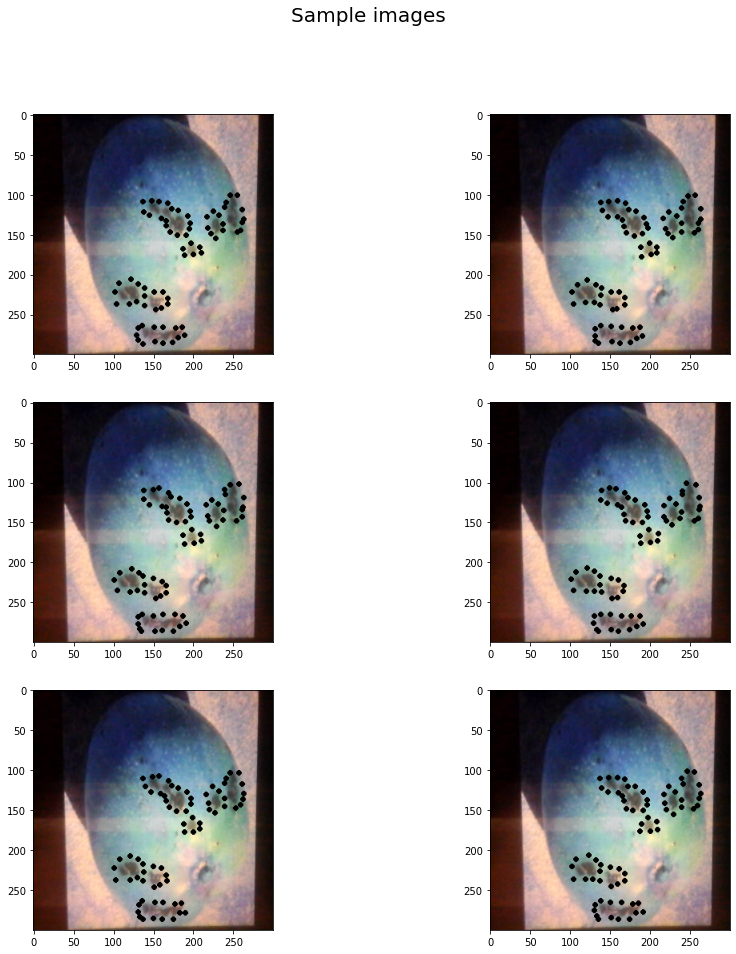

In [ ]:
import matplotlib.pylab as plt
import pandas as pd
import random
import cv2

n = x_data.shape[0]
plt.figure(figsize = (15, 15))
plt.subplots_adjust(hspace = .2)
for i in range(6):
    plt.subplot(3, 2, i + 1)
    k = random.randint(0, 599)
    img = x_data[k]
    points = list(y_data.iloc[k])
    points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
    for x, y in points:
        cv2.circle(img, (int(x), int(y)), 2, (0, 0, 0), 2)
    plt.imshow(img)

_ = plt.suptitle('Sample images', size = 20)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#x_data = x_data.reshape(-1, (150,150), 1)
input_shape = x_data.shape[1:4]
y_data = np.array(y_data, dtype = 'float')
num_class = y_data.shape[1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)
print('Input shape: ', input_shape)
print('Number of output: ', num_class)
print('x train shape: ', x_train.shape)
print('y train shape: ', y_train.shape)
print('x test shape: ', x_test.shape)
print('y test shape: ', y_test.shape)

Input shape:  (300, 300, 3)
Number of output:  140
x train shape:  (540, 300, 300, 3)
y train shape:  (540, 140)
x test shape:  (60, 300, 300, 3)
y test shape:  (60, 140)


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, LeakyReLU, Convolution2D, MaxPool2D
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape = input_shape))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
# model.add(Dense(num_class, activation='softmax'))
model.add(Dense(num_class))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      864       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300, 300, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 300, 300, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 300, 300, 32)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 300, 300, 32)     128       
 hNormalization)                                        

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model.compile(
    optimizer = 'Adam',
    loss = "mean_squared_error",
    metrics = ['mae']
)
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_mae', patience = 25)
hist = model.fit(x_train, y_train, epochs = 1000, batch_size = 16, validation_split = 0.1).history

Epoch 1/1000
31/31 [==============================] - 19s 193ms/step - loss: 4689.4619 - mae: 41.6884 - val_loss: 34787.2891 - val_mae: 178.8589
Epoch 2/1000
31/31 [==============================] - 5s 158ms/step - loss: 143.3664 - mae: 9.3541 - val_loss: 35199.5898 - val_mae: 180.0730
Epoch 3/1000
31/31 [==============================] - 5s 158ms/step - loss: 45.6101 - mae: 5.2899 - val_loss: 34574.0469 - val_mae: 178.4852
Epoch 4/1000
31/31 [==============================] - 5s 158ms/step - loss: 32.4847 - mae: 4.5703 - val_loss: 34044.8477 - val_mae: 177.1326
Epoch 5/1000
31/31 [==============================] - 5s 158ms/step - loss: 23.2495 - mae: 3.8328 - val_loss: 32471.6875 - val_mae: 172.9685
Epoch 6/1000
31/31 [==============================] - 5s 165ms/step - loss: 16.3395 - mae: 3.2256 - val_loss: 30976.3105 - val_mae: 168.9570
Epoch 7/1000
31/31 [==============================] - 5s 159ms/step - loss: 8.2474 - mae: 2.2314 - val_loss: 28737.9863 - val_mae: 162.7527
Epoch 8/1

In [ ]:
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print('Final loss: {:.2f}'.format(final_loss))
print('Final accuracy: {:.2f}'.format(final_accuracy))

2/2 [==============================] - 2s 1s/step - loss: 21.7424 - mae: 4.3864
Final loss: 21.74
Final accuracy: 4.39


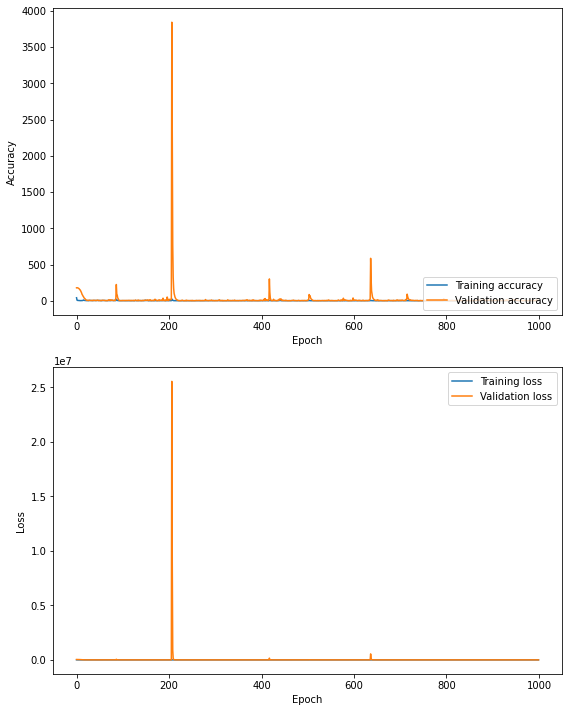

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
model_history = pd.DataFrame(hist)
# add epoch column
model_history['epoch'] = np.arange(1, len(model_history) + 1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
epochs = model_history.shape[0]
ax1.plot(np.arange(0, epochs), model_history['mae'], label = 'Training accuracy')
ax1.plot(np.arange(0, epochs), model_history['val_mae'], label = 'Validation accuracy')
ax1.legend(loc = 'lower right')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax2.plot(np.arange(0, epochs), model_history['loss'], label = 'Training loss')
ax2.plot(np.arange(0, epochs), model_history['val_loss'], label = 'Validation loss')
ax2.legend(loc = 'upper right')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
plt.tight_layout()
plt.show()

In [ ]:
model.save('Project AI Final.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7
[133.82646  106.05764  144.86447  104.80528  154.69185  105.431175
 165.80792  110.31801  169.00983  116.305    177.1697   117.76682
 187.54639  124.373146 190.8639   132.42654  189.76692  139.70563
 184.78647  145.98726  173.81465  147.56955  165.42494  141.24509
 164.2996   135.6528   159.82372  128.2537   156.82393  124.9978
 142.10765  123.47051  135.26851  117.93809  211.4476   125.84716
 219.18692  118.929054 225.89235  123.37273  230.9958   132.91925
 231.33354  142.67613  223.76886  150.07724  215.55907  144.28221
 212.90878  137.687    193.27187  155.39185  202.71388  160.89323
 203.68263  168.23834  194.54953  171.97952  184.12535  173.81502
 182.24982  161.8031   234.609    113.04082  233.8373   107.23743
 241.62428   98.56666  249.84183   98.86023  255.09459  116.151245
 256.79843  127.27393  255.55666  132.8076   253.59508  140.8104
 247.4273   144.6166   117.886734 202.15758  128.02586  206.63986
 134.49513  212.89182  134.45346  221.33801  124.55674  229.66382
 117.040

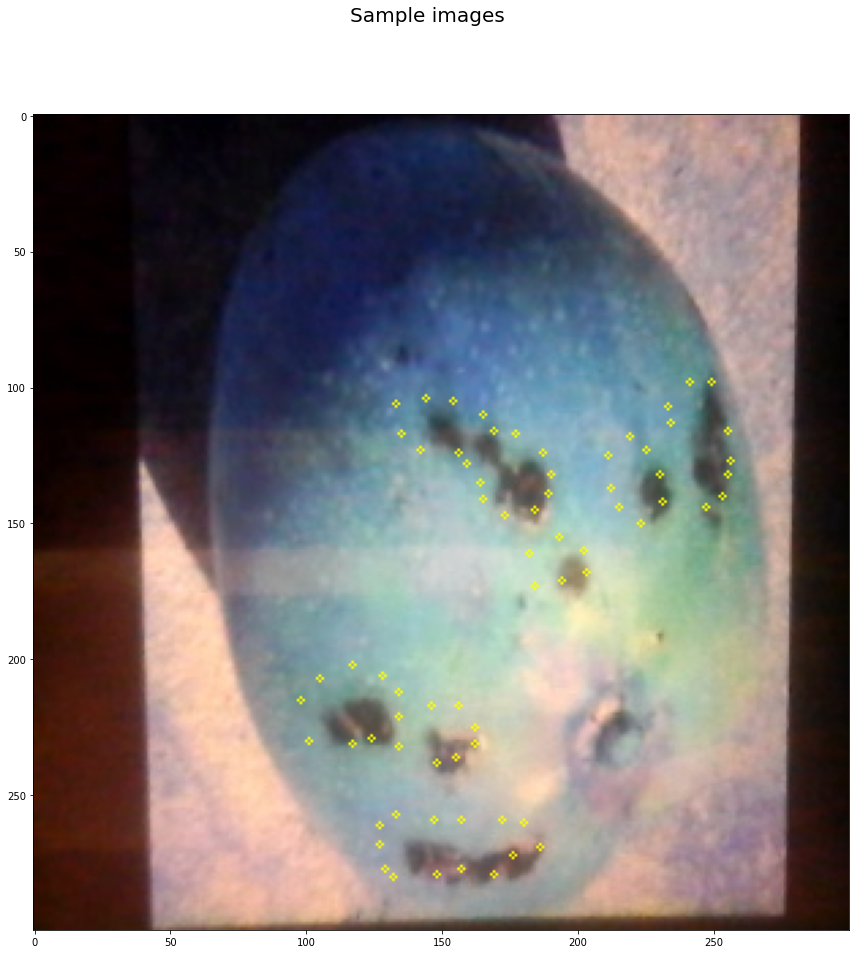

In [ ]:
import matplotlib.pylab as plt
import cv2
pred = model.predict(x_test)
n = x_test.shape[0]
plt.figure(figsize = (15, 15))
plt.subplots_adjust(hspace = .2)
#plt.subplot(3, 2, i + 1)
k = random.randint(0, 39)
print(k)
img = x_test[k].reshape(300,300,3)
points = pred[k,:]
#points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
print(points)
for j in range(70):
  cv2.circle(img, (int(points[j*2]), int(points[j*2+1])), 1, (255, 255, 0), 1)
plt.imshow(img)  
_ = plt.suptitle('Sample images', size = 20)